In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('/content/BankChurners.csv')
df = df[df.columns[:-2]]
df.isnull().sum()

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


In [55]:
df.head(1)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [56]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [57]:
gender = df['Gender'].value_counts()

In [58]:
gender.head()

,count
Gender,
F,5358
M,4769


In [59]:
fig_pie = px.pie(gender, values=gender.values,names=gender.unique(), title='Gender Distribution', hole=0.33)
fig_pie.select_legends()
fig_pie.show()

fig_bar = px.bar(gender, x=gender.index, y=gender.values, title='Gender Distribution')
fig_bar.show()

In [60]:
Cards_Category = df['Card_Category']

In [61]:
Cards_Category_counts = Cards_Category.value_counts()

In [62]:
Cards_Category_counts

,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


In [63]:
fig_pie_Cards = px.pie(Cards_Category_counts, values=Cards_Category_counts.values, names=Cards_Category_counts.index, title='Cards Category Distribution', hole=0.33)
fig_pie_Cards.show()

In [64]:
Educantion_Level_counts = df['Education_Level'].value_counts()
Educantion_Level_counts

,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [65]:
fig_pie_Education = px.pie(Educantion_Level_counts, values=Educantion_Level_counts.values, names=Educantion_Level_counts.index, title='Education Level Distribution', hole=0.33)
fig_pie_Education.show()

In [66]:
Churn_counts = df['Attrition_Flag'].value_counts()
Churn_counts

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [67]:
fig_pie_Churn = px.pie(Churn_counts, values=Churn_counts.values, names=Churn_counts.index, title='Churn Distribution', hole=0.33)
fig_pie_Churn.show()

In [68]:
Dependent_Count=df['Dependent_count'].value_counts()
Dependent_Count

,count
Dependent_count,
3,2732
2,2655
1,1838
4,1574
0,904
5,424


In [69]:
fig_pie_Dependent = px.pie(Dependent_Count, values=Dependent_Count.values, names=Dependent_Count.index, title='Dependent Distribution', hole=0.33)
fig_pie_Dependent.show()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

#### Churn Test

In [71]:
X_Churn = df.drop('Attrition_Flag', axis=1)
y_Churn = df['Attrition_Flag']

In [72]:
y_Churn.head(1)

,Attrition_Flag
0,Existing Customer


In [73]:
from sklearn.preprocessing import LabelEncoder

labelenconder = LabelEncoder()
y_Churn = labelenconder.fit_transform(y_Churn)

In [74]:
y_Churn

array([1, 1, 1, ..., 0, 0, 0])

In [75]:
X_Churn.head(1)

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


In [76]:
X_Churn = pd.get_dummies(X_Churn, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

In [77]:
X_Churn.head(1)

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,True,False,False,False,True,False,False,False


In [78]:
df_copy = pd.concat([X_Churn, pd.Series(y_Churn, name='Attrition_Flag')], axis =1)

<Axes: >

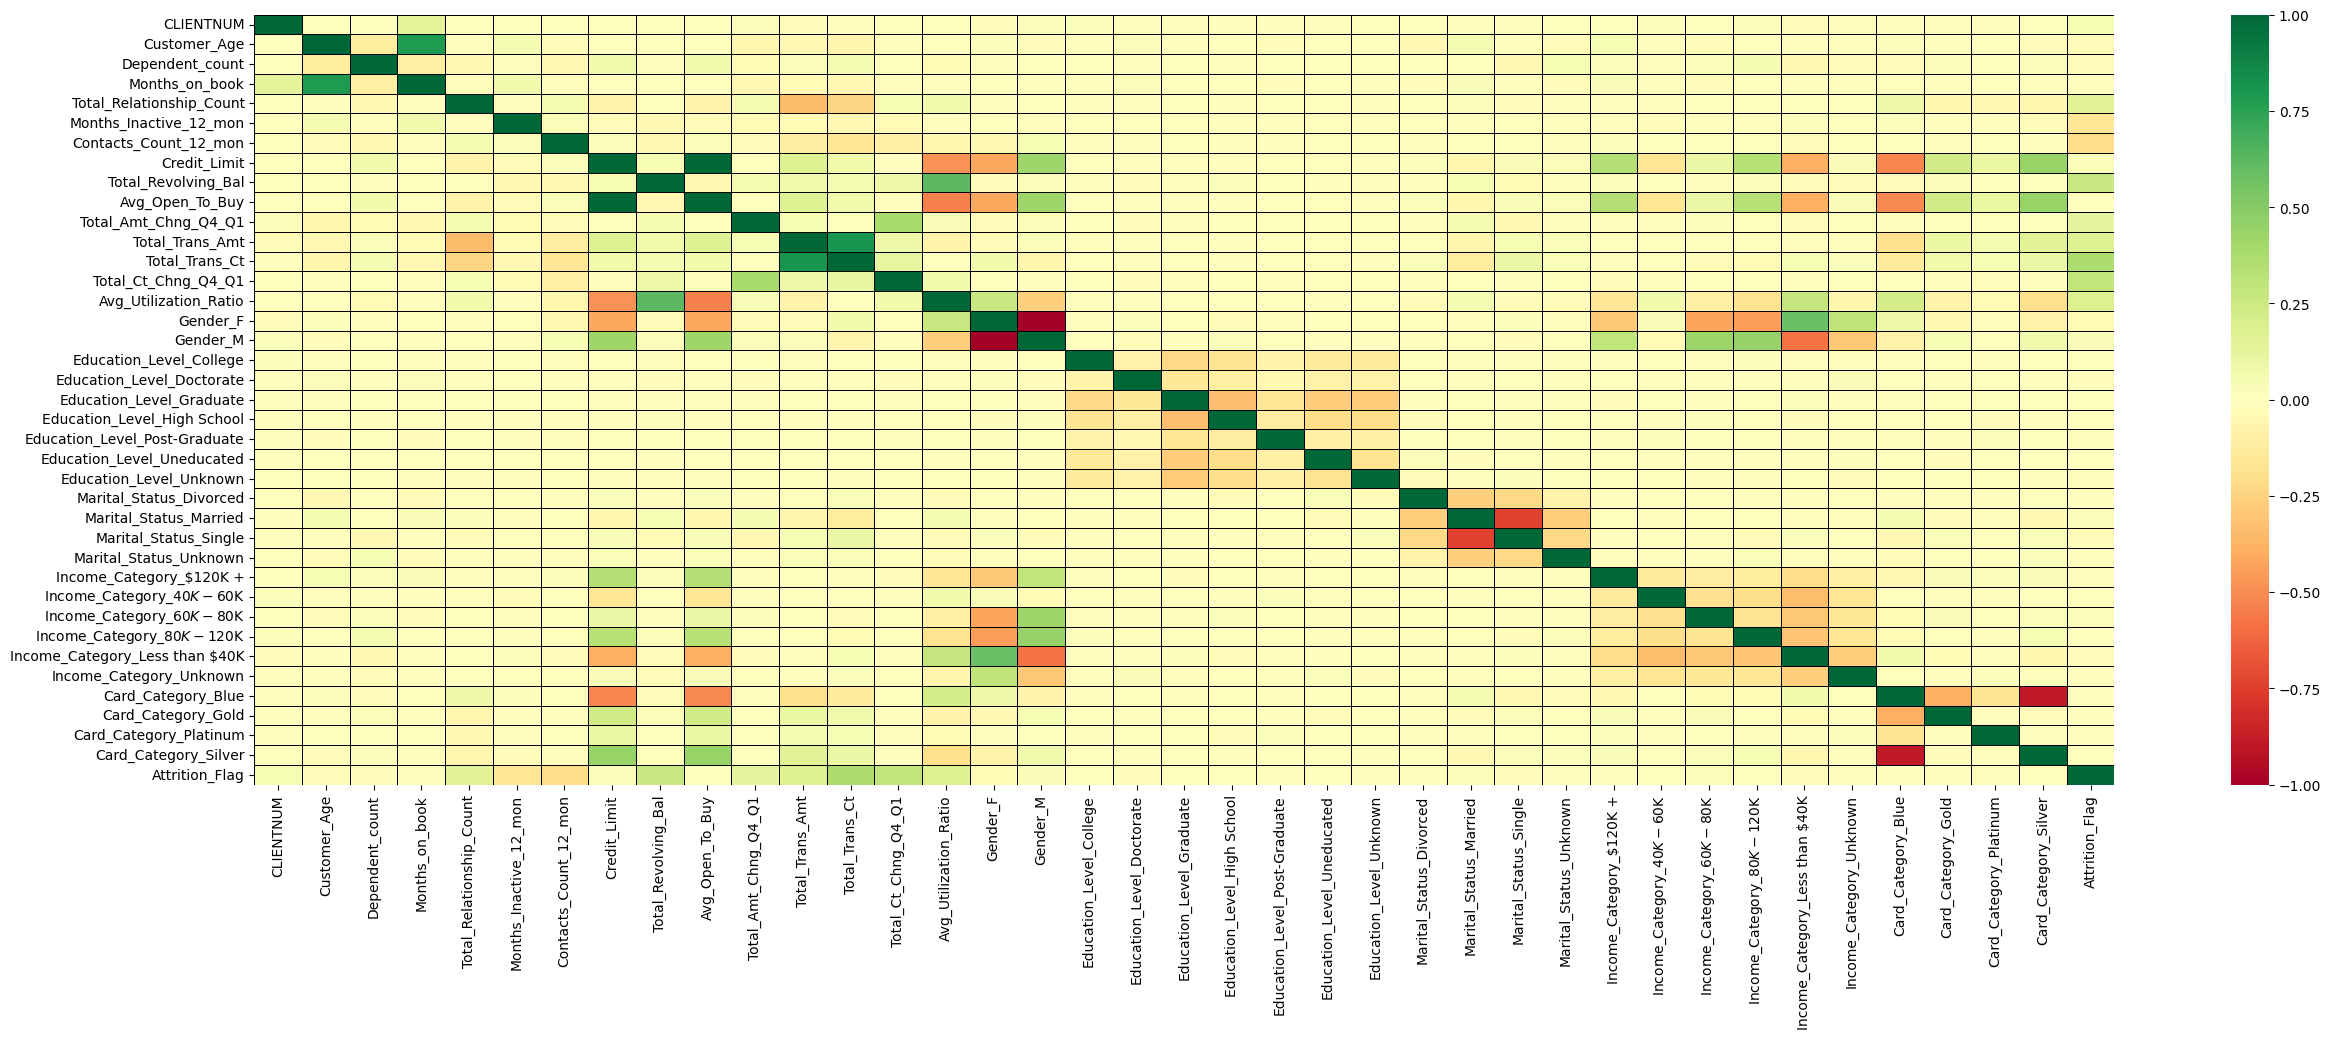

In [79]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df_copy.corr(), annot=False, cmap="RdYlGn", linewidths=.5, linecolor='black')

In [80]:
X_Churn_train, X_Churn_test, y_Churn_train, y_Churn_test = train_test_split(X_Churn, y_Churn, test_size=0.2, random_state=42)
print(len(X_Churn_train), len(X_Churn_test), len(y_Churn_train), len(y_Churn_test))

8101 2026 8101 2026


In [81]:
ml_model_RandomForest = RandomForestClassifier()
ml_model_RandomForest.fit(X_Churn_train, y_Churn_train)

RandomForestClassifier()

In [82]:
from sklearn.metrics import accuracy_score

y_Churn_pred = ml_model_RandomForest.predict(X_Churn_test)
print("Accuracy Score:", accuracy_score(y_Churn_test, y_Churn_pred))

Accuracy Score: 0.9491609081934848


In [83]:
from sklearn.metrics import classification_report

print(classification_report(y_Churn_test, y_Churn_pred))

              precision    recall  f1-score   support

           0       0.93      0.74      0.83       327
           1       0.95      0.99      0.97      1699

    accuracy                           0.95      2026
   macro avg       0.94      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026



In [84]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_Churn_test, y_Churn_pred)

array([[ 243,   84],
       [  19, 1680]])

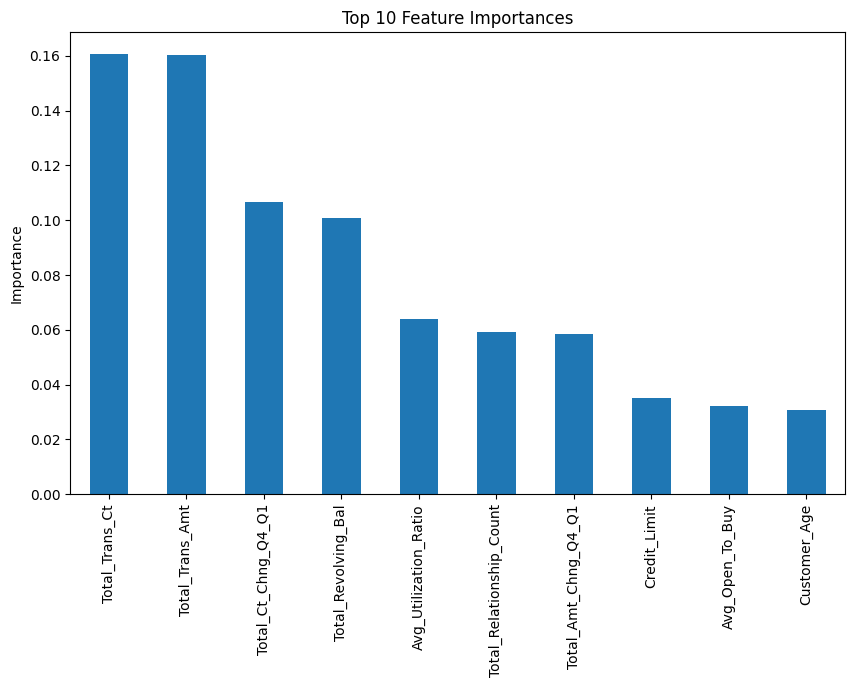

In [85]:
feature_importances = ml_model_RandomForest.feature_importances_
feature_importances_series = pd.Series(feature_importances, index=X_Churn_train.columns)
feature_importances_series_sorted = feature_importances_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importances_series_sorted[:10].plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.show()

#### SMOTE

In [86]:
%pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [87]:
oversample = SMOTE()
X_Churn, y_Churn = oversample.fit_resample(df_copy[df_copy.columns[1:]], df_copy[df_copy.columns[0]])
usampled_df = X_Churn.assign(Churn = y_Churn)

In [88]:
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy()

usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

In [89]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [90]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val =usampled_df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =usampled_df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig.update_layout(height=700, width=900, title_text="Upsmapled Correlations")
fig.show()

#### XGBoost Test

In [91]:
import xgboost as xgb

In [92]:
ml_model_XGBoost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
ml_model_XGBoost.fit(X_Churn_train, y_Churn_train)

y_Churn_pred_xgb = ml_model_XGBoost.predict(X_Churn_test)

print("XGBoost Model Evaluation:")
print("Accuracy:", accuracy_score(y_Churn_test, y_Churn_pred_xgb))
print("\nClassification Report:\n", classification_report(y_Churn_test, y_Churn_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_Churn_test, y_Churn_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[03:10:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




XGBoost Model Evaluation:
Accuracy: 0.9634748272458046

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       327
           1       0.98      0.98      0.98      1699

    accuracy                           0.96      2026
   macro avg       0.93      0.93      0.93      2026
weighted avg       0.96      0.96      0.96      2026


Confusion Matrix:
 [[ 290   37]
 [  37 1662]]


#### ADABoost

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_Churn.drop('Attrition_Flag', axis=1), y_Churn)

AdaBoostClassifier(n_estimators=100, random_state=0)

#### Comparação

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("ADA",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
svm_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("SVM",SVC(random_state=42,kernel='rbf')) ])

f1_cross_val_scores = cross_val_score(rf_pipe, X_Churn_train, y_Churn_train, cv=5, scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe, X_Churn_train, y_Churn_train, cv=5, scoring='f1')
svm_f1_cross_val_scores=cross_val_score(svm_pipe, X_Churn_train, y_Churn_train, cv=5, scoring='f1')

In [97]:
fig = make_subplots(rows=3, cols=1,shared_xaxes=True,subplot_titles=('Random Forest Cross Val Scores',
                                                                     'Adaboost Cross Val Scores',
                                                                    'SVM Cross Val Scores'))

fig.add_trace(
    go.Scatter(x=list(range(0,len(f1_cross_val_scores))),y=f1_cross_val_scores,name='Random Forest'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(ada_f1_cross_val_scores))),y=ada_f1_cross_val_scores,name='Adaboost'),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(x=list(range(0,len(svm_f1_cross_val_scores))),y=svm_f1_cross_val_scores,name='SVM'),
    row=3, col=1
)

fig.update_layout(height=700, width=900, title_text="Different Model 5 Fold Cross Validation")
fig.update_yaxes(title_text="F1 Score")
fig.update_xaxes(title_text="Fold #")

fig.show()

#### Shap

In [98]:
import shap

In [99]:
X_sample = X_Churn_test.sample(n=100, random_state=42)
explainer_randomForest = shap.TreeExplainer(ml_model_RandomForest)
shap_values_sample_RandomForest = explainer_randomForest.shap_values(X_sample)

print(type(shap_values_sample_RandomForest))
print([s.shape for s in shap_values_sample_RandomForest])

<class 'numpy.ndarray'>
[(38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2), (38, 2)]


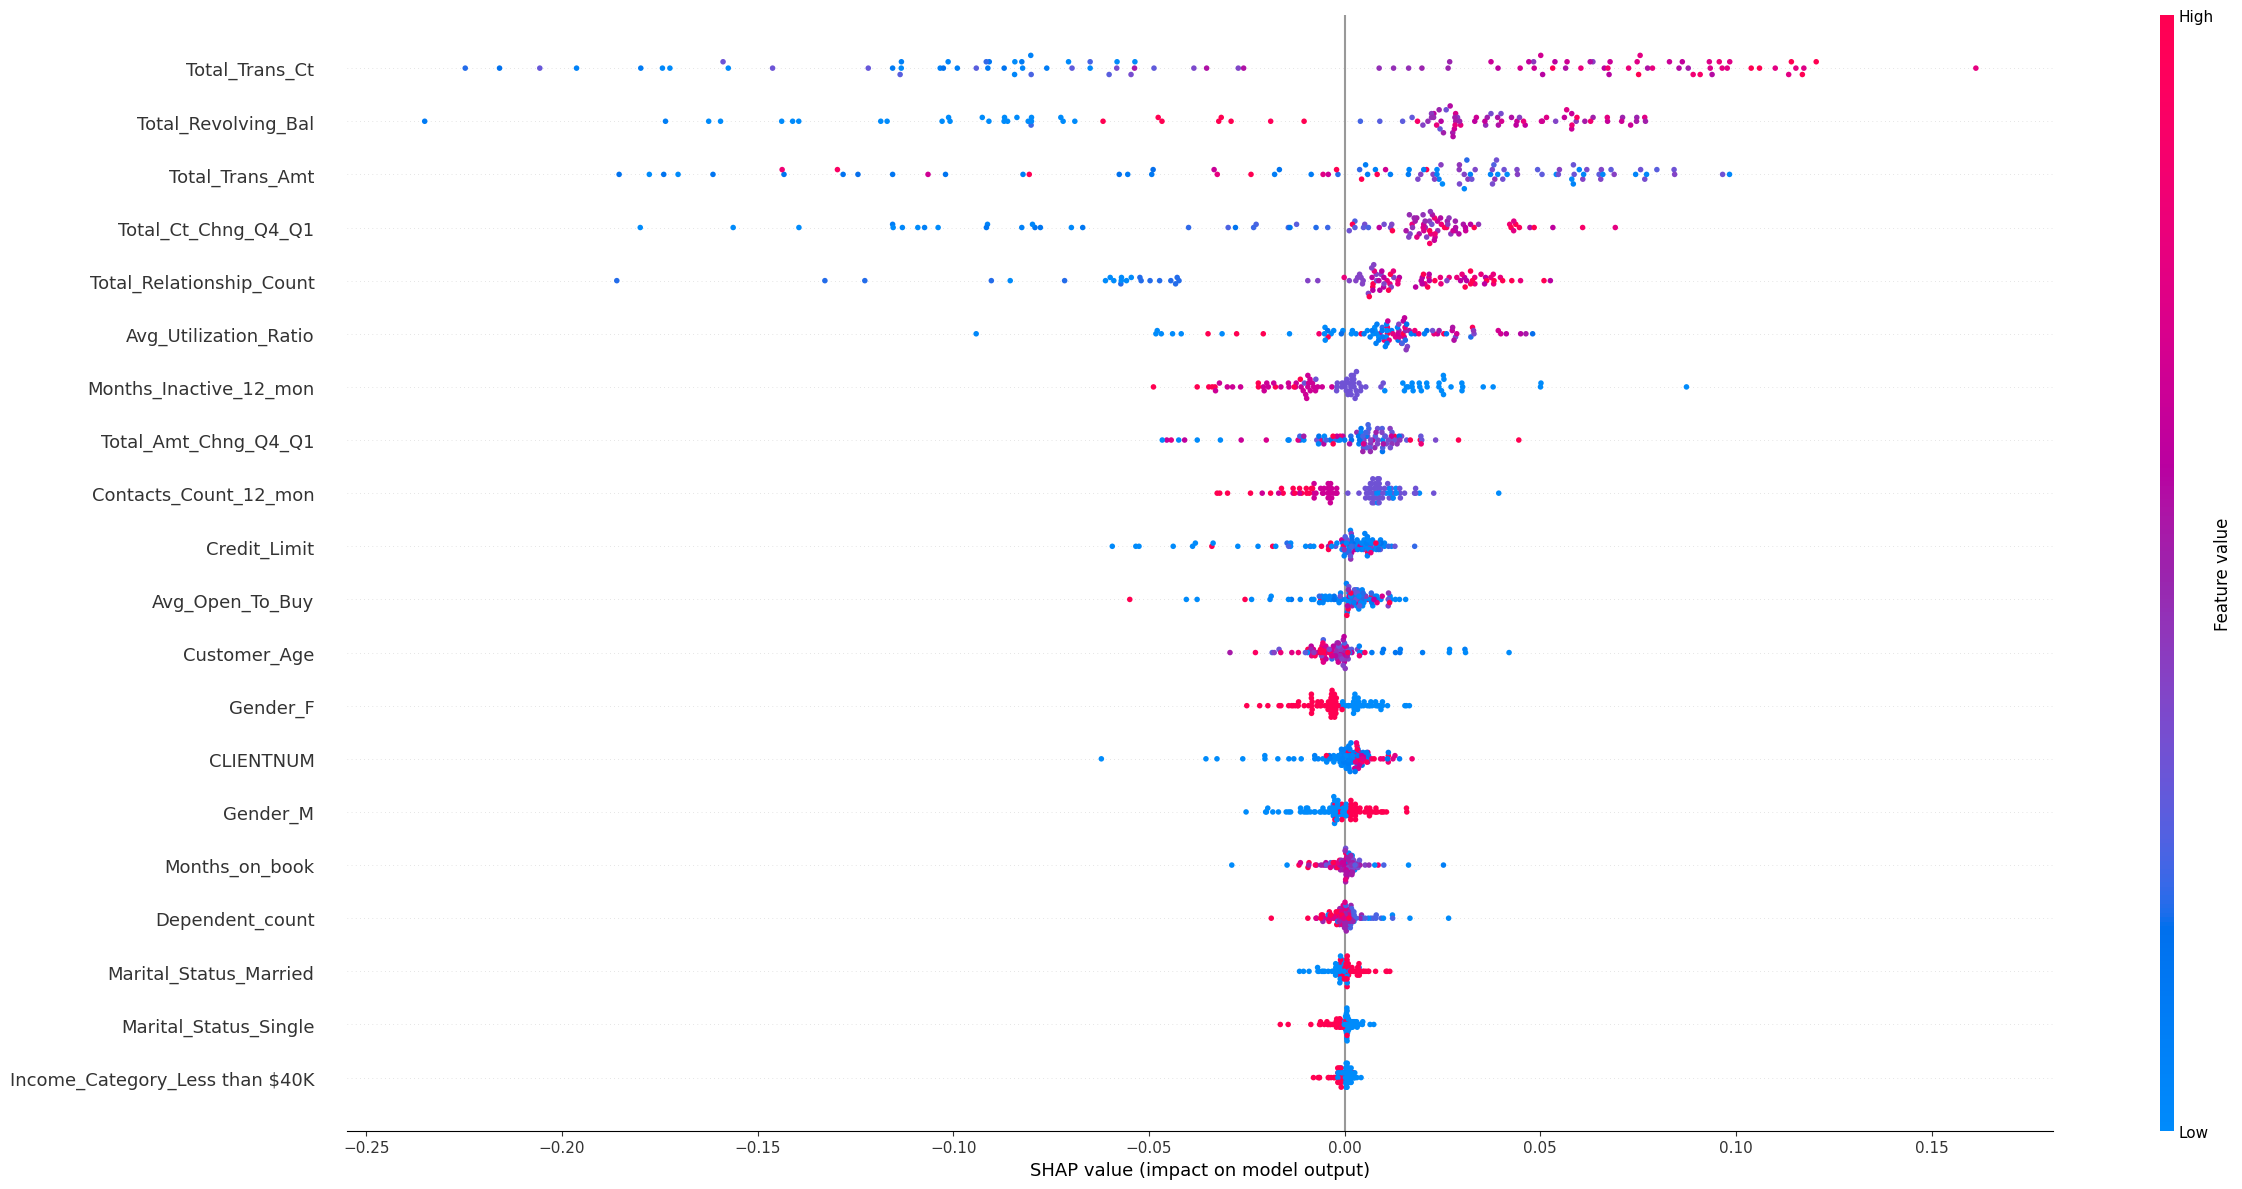

In [100]:
import numpy as np

#Random Forest
shap_stacked = np.stack(shap_values_sample_RandomForest)

shap_class1 = shap_stacked[:, :, 1]

shap.summary_plot(
    shap_class1,
    X_sample,
    feature_names=X_sample.columns,
    plot_size=(25, 12)
)

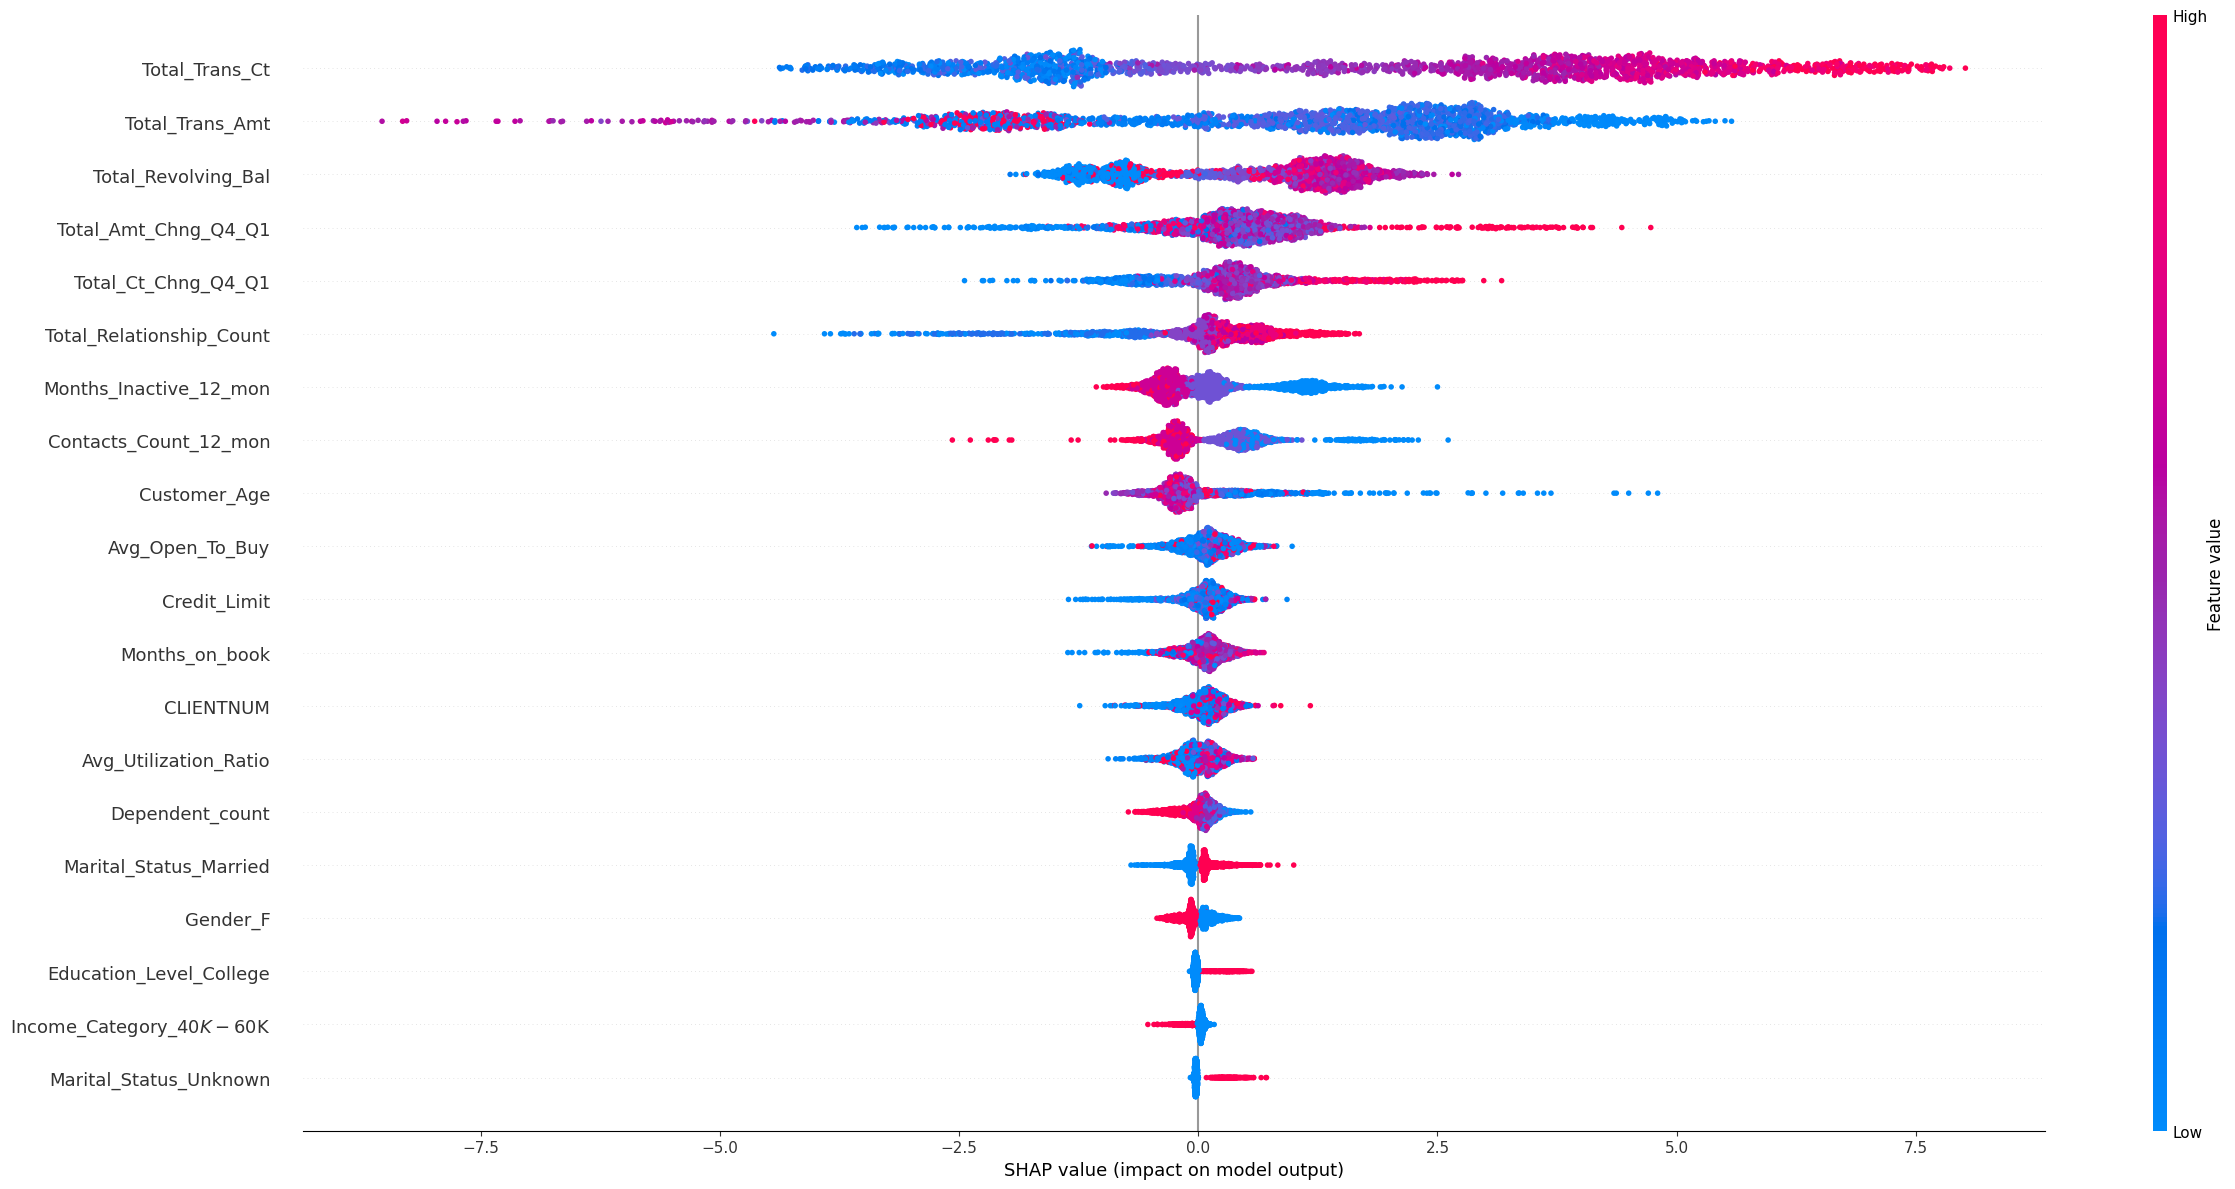

In [101]:
#XGBoost

explainer_xgb = shap.Explainer(ml_model_XGBoost)

# Calcular os valores SHAP para o conjunto de teste
shap_values_xgb = explainer_xgb(X_Churn_test)

shap.summary_plot(
    shap_values_xgb,
    X_Churn_test,
    feature_names=X_Churn_test.columns,
    plot_size=(25, 12),
    title='SHAP Summary Plot for XGBoost'
)

In [102]:
df_copy.to_csv('BankChurners_Process.csv', index=False)